In [28]:
import keras
import random
import collections
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [29]:
def display_random_images_with_labels(d, n=10):
    """
        accept dataset in tuple form, first index is np arrays (images) and second is labels and display n random images with labels from it
        Inputs:
            d (tuple): dataset images, dataset labels on same indexs
            n (int): number of samples to display (default: 10)
        Output:
            None
    """
    choices = list(range(len(d[0])))
    for i in range(n):
        index = random.choice(choices)
        choices.remove(index)
        print("index:",index)
        print("Lable:",d[1][index])
        plt.imshow(d[0][index], cmap='gray')
        plt.show()

There are 60000 images in training dataset
There are 10000 images in testing dataset
___________________
(28, 28)
___________________
Randomly printing 10 images with labels from training dataset
index: 13528
Lable: 0


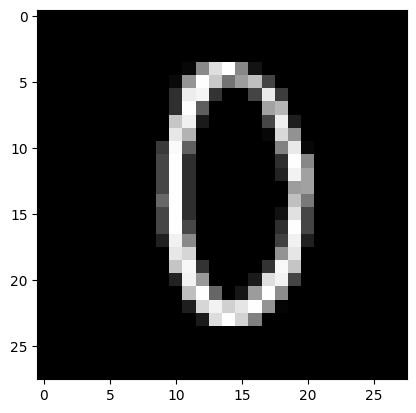

index: 18205
Lable: 8


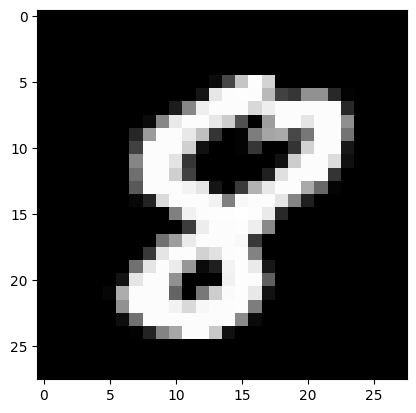

index: 25493
Lable: 9


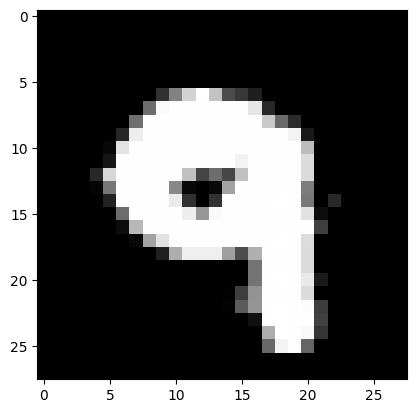

index: 33218
Lable: 4


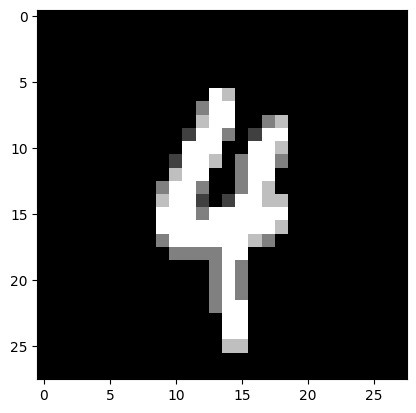

index: 29354
Lable: 5


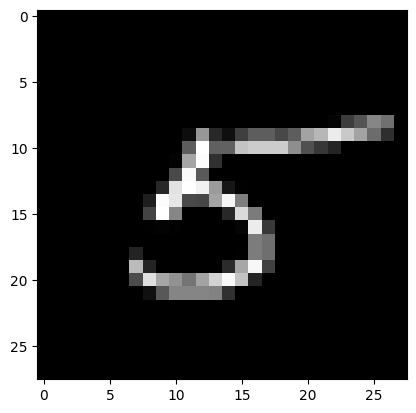

index: 33856
Lable: 1


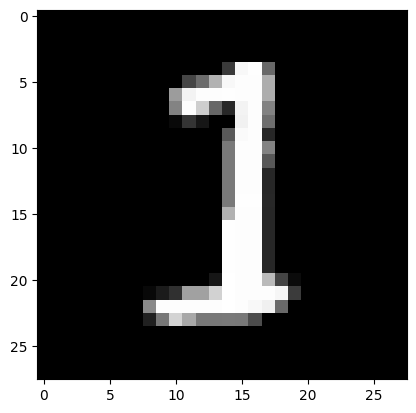

index: 33005
Lable: 1


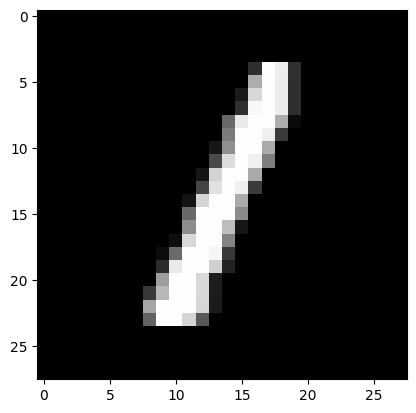

index: 14966
Lable: 4


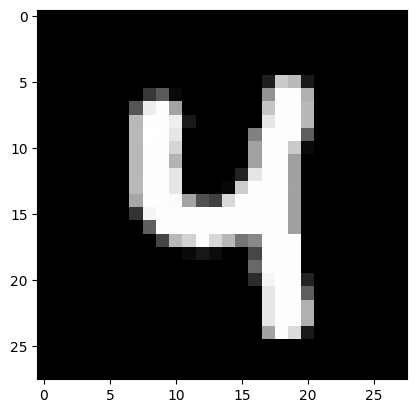

index: 46193
Lable: 9


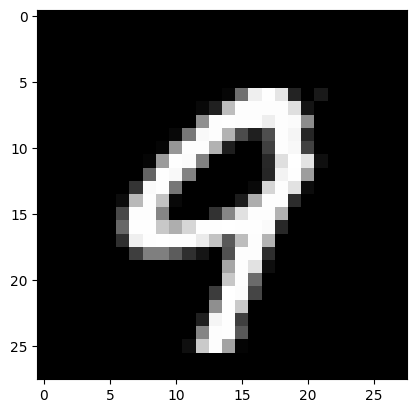

index: 14035
Lable: 8


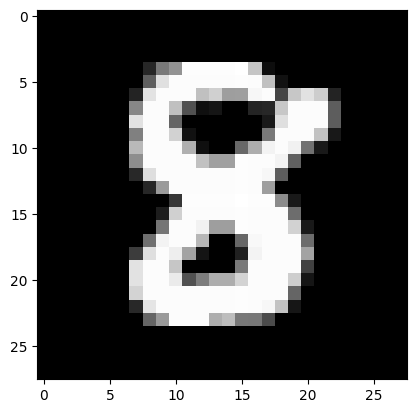

___________________
Randomly printing 10 images with labels from testing dataset
index: 20199
Lable: 5


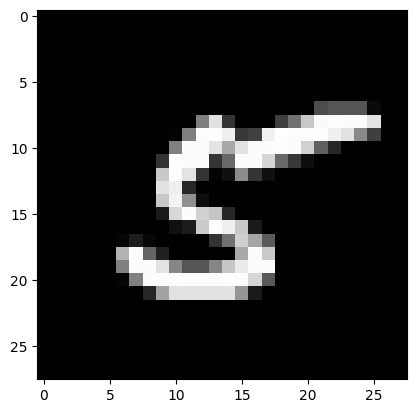

index: 15097
Lable: 3


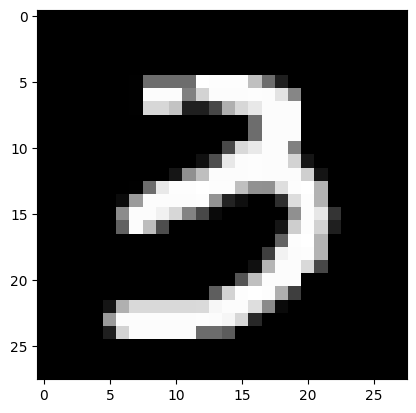

index: 20511
Lable: 8


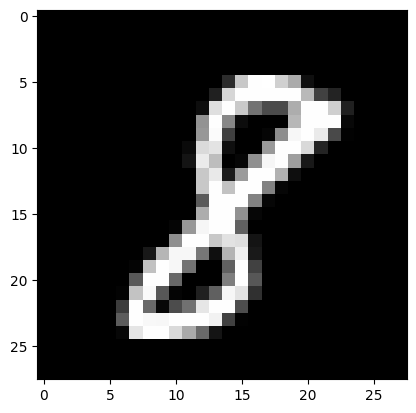

index: 8573
Lable: 2


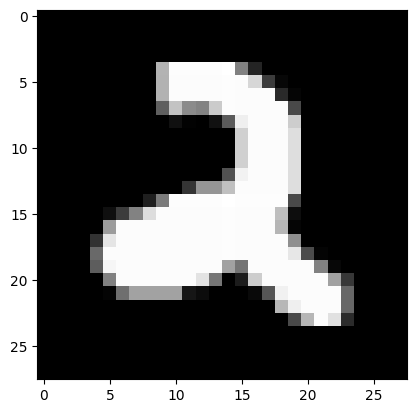

index: 32117
Lable: 7


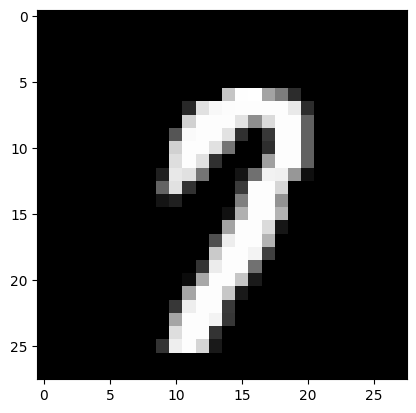

index: 13938
Lable: 5


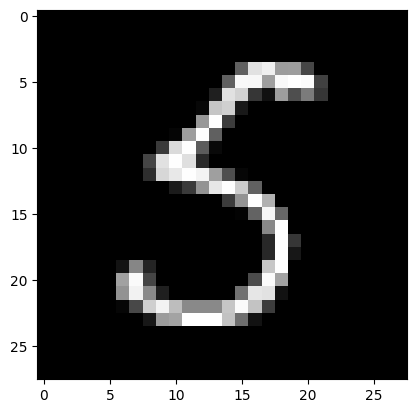

index: 56142
Lable: 4


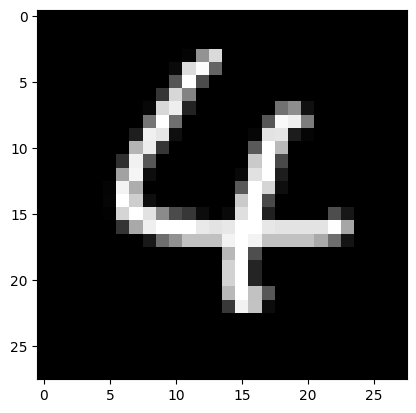

index: 45175
Lable: 5


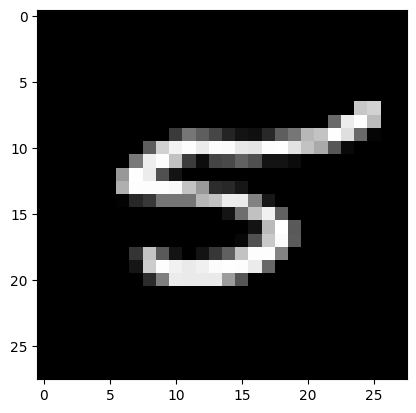

index: 9640
Lable: 8


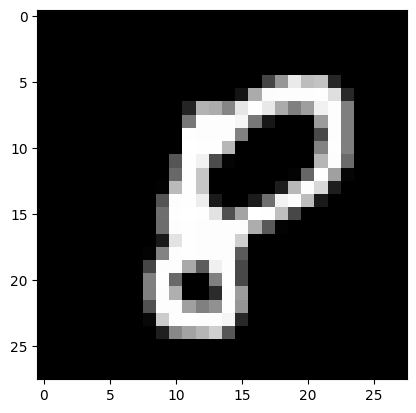

index: 43194
Lable: 8


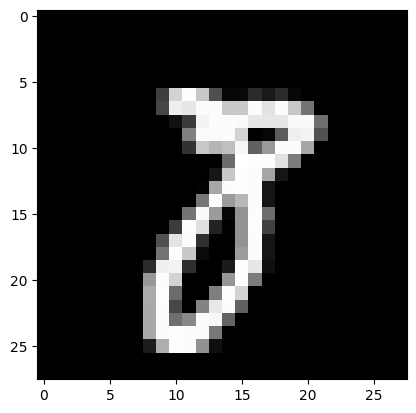

___________________
There are 60000 labels in training dataset for 60000 images in training dataset
There are 10000 labels in testing dataset for 10000 images in testing dataset
___________________
There are 10 unique classes in training dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({5: 5421,
         0: 5923,
         4: 5842,
         1: 6742,
         9: 5949,
         2: 5958,
         3: 6131,
         6: 5918,
         7: 6265,
         8: 5851})

There are 10 unique classes in validation dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({7: 1028,
         2: 1032,
         1: 1135,
         0: 980,
         4: 982,
         9: 1009,
         5: 892,
         6: 958,
         3: 1010,
         8: 974})

__________


In [30]:
# Loading dataset
dataset = tf.keras.datasets.mnist.load_data()

#Description of dataset
""" 	mnist is handwritten digits (0 to 9) images dataset
      keras.datasets.mnist.load_data() loads those images in gray scale as cv2 images / np arrays with those labels dataset is in tuple form,
      its first index dataset[0] represents training dataset
      its second index dataset[1] represents testing dataset
      Both training (dataset[0]) and testing (dataset[1]) datasets
      are further tuples and have two elements, first element of both training and testing (dataset[0][0] and dataset[0][0])
      represents images in numpy arrays"""


print("There are",len(dataset[0][0]),"images in training dataset")

print("There are",len(dataset[1][0]),"images in testing dataset")

print("___________________")

""" Each image is of shape 28x28"""

print(dataset[0][0][0].shape)
print("___________________")

"""second element of both training and testing (dataset[0][1] and dataset[0][1]) represnts labels of the images, presents on the same index in images
For example dataset[0][0][0] is an image in training dataset and dataset[0][1][0] is the label of same image is training dataset"""

print("Randomly printing 10 images with labels from training dataset")

display_random_images_with_labels(dataset[0])

print("___________________")

print("Randomly printing 10 images with labels from testing dataset")

display_random_images_with_labels(dataset[0])

print("___________________")

print("There are",len(dataset[0][1]),"labels in training dataset for",len(dataset[0][0]),"images in training dataset")

print("There are",len(dataset[1][1]),"labels in testing dataset for",len(dataset[1][0]),"images in testing dataset")

print("___________________")

print("There are", len(set(dataset[0][1])),"unique classes in training dataset")

print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")

display(collections.Counter(dataset[0][1]))

print("There are", len(set(dataset[1][1])),"unique classes in validation dataset")

print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")

display(collections.Counter(dataset[1][1]))

print("__________")


In [31]:
# Task

"""You have to reduce the size of this dataset by 10 times.
There are currently almost 5000 to 6000 thousand images (total: 60000) for each label in training and almost 1000 images (total: 10000) for each label in testing dataset.
You are required to reduce this training dataset so that it will have exactly 600 images for each label (total: 6000) in training dataset and exactly 100 images for each label in testing dataset (total: 1000)
new dataset should be stored into new_dataset variable name and should have exactly same format as the original dataset
Your code here"""

# Function to reduce the dataset to a specified size per label
def reduce_dataset(dataset, size_per_label):
    new_dataset = []
    unique_labels = np.unique(dataset[1])
    for label in unique_labels:
        indices = np.where(dataset[1] == label)[0][:size_per_label]
        new_data = dataset[0][indices]
        new_labels = np.array([label] * len(indices))
        new_dataset.extend(list(zip(new_data, new_labels)))
    return new_dataset

# Reducing the training dataset to have exactly 600 images for each label
new_train = reduce_dataset(dataset[0], 600)

# Reducing the testing dataset to have exactly 100 images for each label
new_test = reduce_dataset(dataset[1], 100)

new_dataset=(new_train,new_test)

In [32]:
# Validation of Task

# Checking the shape of first image in new training dataset
print(new_train[0][0].shape)
print("___________________")


#Checking the size of dataset
print("There are",len([label for _, label in new_train]),"labels in training dataset for",len(new_train),"images in training dataset")

print("There are",len([label for _, label in new_test]),"labels in training dataset for",len(new_test),"images in training dataset")

print("___________________")

"""Excepted output
There are 6000 labels in training dataset for 6000 images in training dataset
There are 1000 labels in training dataset for 1000 images in training dataset"""

(28, 28)
___________________
There are 6000 labels in training dataset for 6000 images in training dataset
There are 1000 labels in training dataset for 1000 images in training dataset
___________________


'Excepted output\nThere are 6000 labels in training dataset for 6000 images in training dataset\nThere are 1000 labels in training dataset for 1000 images in training dataset'

In [33]:
#Checking the number of images per class
print("There are", len(set([label for _, label in new_dataset[0]])),"unique classes in training dataset")

print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")

display(collections.Counter([label for _, label in new_dataset[0]]))

print("There are", len(set([label for _, label in new_dataset[1]])),"unique classes in validation dataset")

print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")

display(collections.Counter([label for _, label in new_dataset[1]]))

print("___________________")

There are 10 unique classes in training dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({0: 600,
         1: 600,
         2: 600,
         3: 600,
         4: 600,
         5: 600,
         6: 600,
         7: 600,
         8: 600,
         9: 600})

There are 10 unique classes in validation dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({0: 100,
         1: 100,
         2: 100,
         3: 100,
         4: 100,
         5: 100,
         6: 100,
         7: 100,
         8: 100,
         9: 100})

___________________


In [ ]:
""""Expected output
There are 10 unique classes in training dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)
Counter({0: 600,
1: 600,
2: 600,
3: 600,
4: 600,
5: 600,
6: 600,
7: 600,
8: 600,
9: 600})
There are 10 unique classes in validation dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)
Counter({0: 100,
1: 100,
2: 100,
3: 100,
4: 100,
5: 100,
6: 100,
7: 100,
8: 100,
9: 100})"""